In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.misc import derivative
from matplotlib.ticker import FuncFormatter, MultipleLocator
from scipy import signal

# Sprzężone oscylatory

In [ ]:
omega1 = 2
omega2 = 3
tmax = 3*np.pi

In [ ]:
print(f'Stosunek częstości: {omega1/omega2}')
dtheta1 = omega1 #Faza Thety#
dtheta2 = omega2

Stosunek częstości: 0.6666666666666666


In [ ]:
k1 = 3.0 #*coupling constants*#
k2 = 2.5
omega1 = 5 + np.sqrt(np.pi)
omega2 = 1
tmax = 3*np.pi
kk = k1+k2

dtheta1 = lambda theta1, theta2: omega1 + k1*np.sin(theta2 - theta1)
dtheta2 = lambda theta1, theta2: omega2 + k2*np.sin(theta1 - theta2)

In [ ]:
print(f'Stosunek częstości: {np.round(omega1/omega2,3)}')

Stosunek częstości: 6.772


In [ ]:
def func(z,t):
    th1, th2 = z # theta1, theta2
    return [dtheta1(th1,th2), dtheta2(th1,th2)]   

z0=[0,1]
t = np.linspace(0,tmax,1000)
# print(max(t))
XX = odeint(func, z0, t)
theta1 = XX[:, 0]
theta2 = XX[:, 1]
# print(xx)

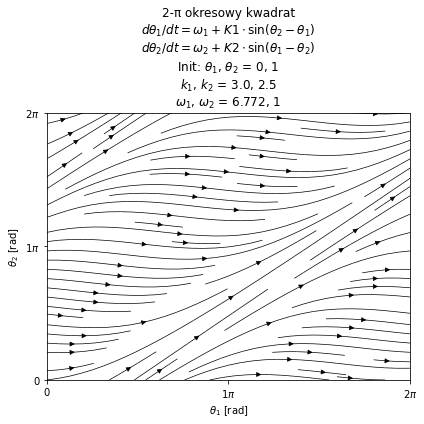

In [ ]:
x = np.linspace(0, 2*np.pi,360)
y = np.linspace(0, 2*np.pi,360)
X, Y = np.meshgrid(x, y)
U = dtheta1(X,Y)
V = dtheta2(X,Y)
fig, ax = plt.subplots(1,figsize = (6, 6))
plt.streamplot(X, Y, U, V, density = 1, linewidth=0.7, color='black')
period = 1
x=np.array([])
y=np.array([])
addval = lambda period, arr, x: arr + x-2*np.pi*period 
period = 2*np.pi
linetheta1lim = []
linetheta2lim = [] 

theta1lim = [theta - period*np.floor(theta/period) if np.floor(theta/period)>0 else theta for theta in theta1] 
theta2lim = [theta - period*np.floor(theta/period) if np.floor(theta/period)>0 else theta for theta in theta2] 
theta1win = [0]
theta2win = []
xwin = 0 
ywin = 0

for i in range(len(theta1)):
    if np.floor(theta1[i]/period)!=xwin:
      theta1win=theta1win + [i]
      xwin = xwin + 1

for j in range(len(theta1)):
    if np.floor(theta2[j]/period)!=ywin:
      theta2win=theta2win + [j]
      ywin = ywin + 1

thetawin = sorted(theta1win+theta2win) # points where points touch 2*pi on x and y axis

col = np.arange(len(thetawin))

ax.xaxis.set_major_formatter(FuncFormatter(
   lambda val,pos: '{:.0g}$\pi$'.format(val/np.pi) if val !=0 else '0'
))
ax.yaxis.set_major_formatter(FuncFormatter(
   lambda val,pos: '{:.0g}$\pi$'.format(val/np.pi) if val !=0 else '0'
))
ax.xaxis.set_major_locator(MultipleLocator(base=np.pi))
ax.yaxis.set_major_locator(MultipleLocator(base=np.pi))
plt.title(f'2-π okresowy kwadrat\n$dθ_1/dt=ω_1+K1 \cdot \sin(θ_2-θ_1)$\n$dθ_2/dt=ω_2+K2 \cdot \sin(θ_1-θ_2)$\nInit: $θ_1$, $θ_2$ = {z0[0]}, {z0[1]}\n$k_1$, $k_2$ = {k1}, {k2}\n$ω_1$, $ω_2$ = {np.round(omega1,3)}, {np.round(omega2,3)}')
plt.xlabel('$θ_1$ [rad]')
plt.ylabel('$θ_2$ [rad]')
plt.savefig(f'2pi_t1_{z0[0]}_t2_{z0[0]}_k1_{k1}_k2_{k2}_om1_{np.round(omega1,3)}_om2_{np.round(omega2,3)}.png')
plt.show()

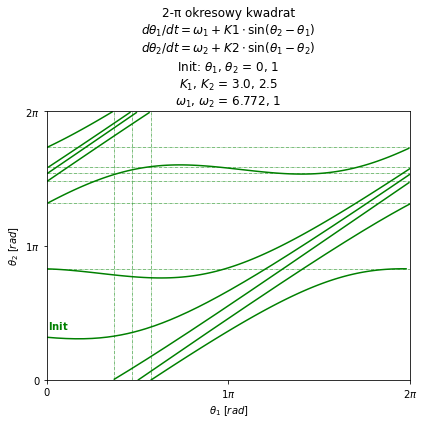

In [ ]:
fig, ax = plt.subplots(1,figsize = (6, 6))
for i in range(0,len(thetawin)):
  if i+1 >= len(thetawin):
    break 
  plt.plot(theta1lim[thetawin[i]:thetawin[i+1]], theta2lim[thetawin[i]:thetawin[i+1]],c='g')
for j in range(1,len(theta1win)):
  plt.axhline(theta2lim[theta1win[j]],ls='-.',lw=0.5,c='green') #plot_color_gradients
for j in range(1,len(theta2win)):
  plt.axvline(theta1lim[theta2win[j]],ls='-.',lw=0.5,c='green')


plt.annotate('$\\bfInit$', # this is the text
                 (theta1lim[0],theta2lim[0]), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(12,8), # distance from text to points (x,y)
                 ha='center',
                 color='green') # horizontal alignment can be left, right or center
ax.xaxis.set_major_formatter(FuncFormatter(
   lambda val,pos: '{:.0g}$\pi$'.format(val/np.pi) if val !=0 else '0'
))
ax.yaxis.set_major_formatter(FuncFormatter(
   lambda val,pos: '{:.0g}$\pi$'.format(val/np.pi) if val !=0 else '0'
))
ax.xaxis.set_major_locator(MultipleLocator(base=np.pi))
ax.yaxis.set_major_locator(MultipleLocator(base=np.pi))
plt.title(f'2-π okresowy kwadrat\n$dθ_1/dt=ω_1+K1 \cdot \sin(θ_2-θ_1)$\n$dθ_2/dt=ω_2+K2 \cdot \sin(θ_1-θ_2)$\nInit: $θ_1$, $θ_2$ = {z0[0]}, {z0[1]}\n$K_1$, $K_2$ = {k1}, {k2}\n$ω_1$, $ω_2$ = {np.round(omega1,3)}, {np.round(omega2,3)}')
plt.xlabel('$θ_1$ $[rad]$')
plt.ylabel('$θ_2$ $[rad]$')
plt.xlim(0,2*np.pi)
plt.ylim(0,2*np.pi)
plt.savefig(f'2pi_t1_{z0[0]}_t2_{z0[0]}_k1_{k1}_k2_{k2}_om1_{np.round(omega1,3)}_om2_{np.round(omega2,3)}_simple.png')
plt.show()

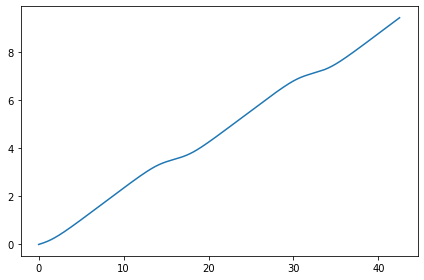

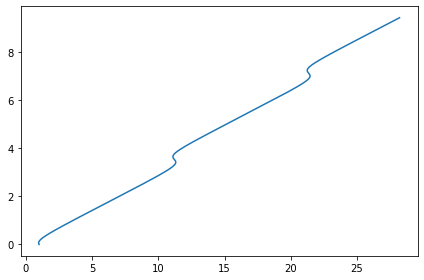

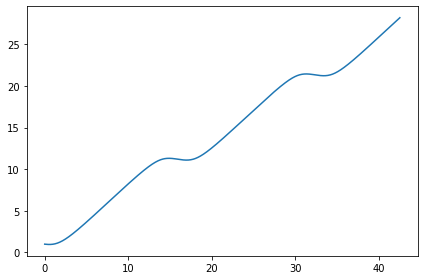

In [ ]:
plt.plot(theta1, t)
plt.show()
plt.plot(theta2, t)
plt.show()
plt.plot(theta1, theta2)
plt.show()

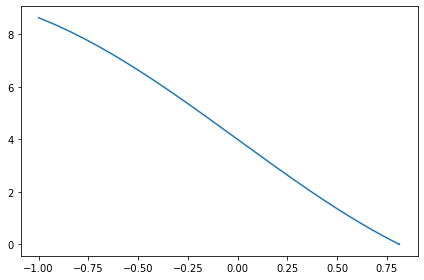

In [ ]:
phasediff = theta1-theta2
dphase = omega1-omega2-(k1+k2)*np.sin(phasediff)
plt.plot(phasediff,dphase)
plt.show()

#Kopany Rotator

In [ ]:
def dphi1(phi1, phi2, tau, j, m, r):
  if m+phi1>1:
    m = m-m*np.floor(m+phi1)
  if phi1==j-tau:
    ret = r+m*signal.unit_impulse(t-)
  else:
    ret = r
  return ret

def dphi2(phi1, phi2, tau, i, M, R):
  if M+phi2>1:
    M = M-M*np.floor(M+phi2)
  if phi2==i-tau:
    ret = R+M
  else:
    ret = R
  return ret  

def func(z,t,m,M,r,R): 
    phi1, phi2 = z 
    return [dphi1(phi1,phi2,tau,t,m,r), dphi2(phi1,phi2,tau,t,M,R)] 

m=1
M=1

r = 8
R = 1
tau = 1

tmax = 1000
z0=[0,0]
t = np.linspace(0,tmax)
XX = odeint(func, z0, t, args=(m,M,r,R))
phi1 = XX[:, 0]
phi2 = XX[:, 1]

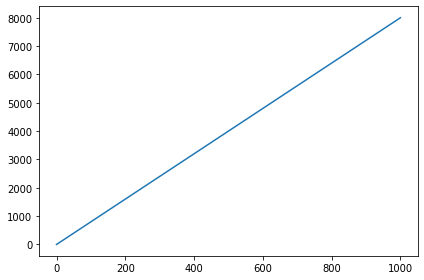

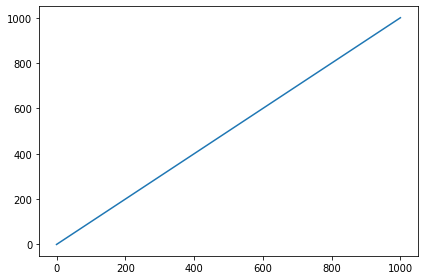

In [ ]:
plt.plot(t,phi1)
plt.show()
plt.plot(t,phi2)
plt.show()